# Singular value decomposition

The SVD of a $m \times n$ matrix $A$ is

$$
A = U \Sigma V^\star
$$

We use [numpy.linalg.svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) or [scipy.linalg.svd](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) to compute this. Below we use numpy.

In [1]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

Construct a random $3 \times 2$ matrix.

In [2]:
A = 2 * np.random.rand(3,2) - 1

## Reduced SVD

The reduced SVD is given by

```
U,S,Vh = np.linalg.svd(A, full_matrices=False)
```

The function returns $\textrm{Vh} = V^\star$.

The singular vectors and values are given by

\begin{align*}
u_j &= \textrm{U[:,j]}, & 0 \le j < n \\
v_j &= \textrm{Vh[j,:]}, & 0 \le j < n \\
\sigma_j &= \textrm{S[j]}, & 0 \le j < n
\end{align*}

In [3]:
U,S,Vh = np.linalg.svd(A, full_matrices=False)
print('U = \n', U)
print('sigma = ', *S)
print('V = \n', Vh.T)

U = 
 [[ 0.00267403  0.80861386]
 [-0.80434028 -0.34782932]
 [-0.5941629   0.47450857]]
sigma =  1.3225630355471398 0.9880838451058491
V = 
 [[ 0.47043848  0.88243279]
 [ 0.88243279 -0.47043848]]


$U$ is $m \times n$ and $V$ is $n \times n$. We can verify that $A = U \Sigma V^\star$ by computing the element-wise maximum difference

In [4]:
print(np.abs(A - U@np.diag(S)@Vh).max())

3.3306690738754696e-16


## Full SVD

The full SVD is given by

```
U,S,Vh = np.linalg.svd(A, full_matrices=True)
```

The singular vectors and values are given by

\begin{align*}
u_j &= \textrm{U[:,j]}, & 0 \le j < m \\
v_j &= \textrm{Vh[j,:]}, & 0 \le j < n \\
\sigma_j &= \textrm{S[j]}, & 0 \le j < n
\end{align*}

In [5]:
U,S,Vh = np.linalg.svd(A, full_matrices=True)
print('U = \n', U)
print('sigma = ', *S)
print('V = \n', Vh.T)

U = 
 [[ 0.00267403  0.80861386 -0.58833364]
 [-0.80434028 -0.34782932 -0.48171721]
 [-0.5941629   0.47450857  0.6494706 ]]
sigma =  1.3225630355471398 0.9880838451058491
V = 
 [[ 0.47043848  0.88243279]
 [ 0.88243279 -0.47043848]]


$U$ is $m \times m$ and $V$ is $n \times n$.

## Rank deficient case

Construct a random $4 \times 3$ matrix whose last column is sum of first two columns. Its rank is 2.

In [6]:
A = 2 * np.random.rand(4,3) - 1
A[:,2] = A[:,0] + A[:,1]

Compute the reduced SVD

In [7]:
U,S,Vh = np.linalg.svd(A, full_matrices=False)
print('U = \n', U)
print('sigma = ', *S)
print('V = \n', Vh.T)

U = 
 [[-0.09013956 -0.12196454  0.61253356]
 [-0.54290254 -0.29600011  0.55978245]
 [-0.71857556 -0.29395801 -0.55124961]
 [-0.42518331  0.90060939  0.08700642]]
sigma =  2.2619867621912704 0.5868820835438222 7.868838835374819e-17
V = 
 [[-0.53874899  0.61352766 -0.57735027]
 [-0.26195604 -0.77333414 -0.57735027]
 [-0.80070504 -0.15980648  0.57735027]]


We notice that one out of three singular values is zero. The number of non-zero singular values corresponds to the rank of the matrix.

## Random matrix

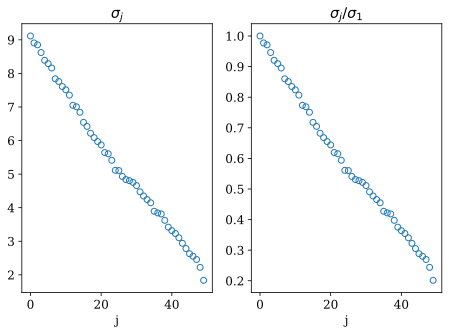

In [8]:
m, n = 100, 50
A = 2 * np.random.rand(m,n) - 1
U,S,Vh = np.linalg.svd(A, full_matrices=False)

plt.subplot(121)
plt.plot(S,'o')
plt.xlabel('j')
plt.title('$\\sigma_j$')

plt.subplot(122)
plt.plot(S/S[0],'o')
plt.xlabel('j')
plt.title('$\\sigma_j/\\sigma_1$');

All singular values are of very similar size.